<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/audio_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@eb04d1b21e08cfd0713164c0907aeb4c98fd83af timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

Cloning into 'ImageBind'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 146 (delta 60), reused 39 (delta 39), pack-reused 58 (from 1)
Receiving objects: 100% (146/146), 2.64 MiB | 37.10 MiB/s, done.
Resolving deltas: 100% (68/68), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision eb04d1b21e08cfd0713164c0907aeb4c98fd83af) to /tmp/pip-req-build-u749a26j
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-u749a26j
  Running command git rev-parse -q --verify 'sha^eb04d1b21e08cfd0713164c0907aeb4c98fd83af'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Running command git checkout -q eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit eb04d1b2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!git clone https://github.com/YashNita/Animal-Sound-Dataset.git

Cloning into 'Animal-Sound-Dataset'...
remote: Enumerating objects: 887, done.
remote: Total 887 (delta 0), reused 0 (delta 0), pack-reused 887 (from 1)
Receiving objects: 100% (887/887), 100.68 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Updating files: 100% (876/876), done.


In [ ]:
import os
from functools import reduce

def list_audio_files_in_dir(directory_path):
    return [directory_path + "/" + f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

animals_to_animal_names = {
    "Aslan": "lion",
    "Esek": "donkey",
    "Inek": "cow",
    "Koyun": "sheep",
}
animals = reduce(lambda x, y: {**x, **y}, [{ animals_to_animal_names[animal_name]: { "audios": list_audio_files_in_dir("/content/Animal-Sound-Dataset/"+animal_name)}} for animal_name in animals_to_animal_names.keys()])
text_list = list(animals.keys())

animals

{'lion': {'audios': ['/content/Animal-Sound-Dataset/Aslan/aslan_24.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_27.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_6.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_18.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_1.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_3.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_4.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_44.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_29.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_22.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_39.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_37.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_32.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_11.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_41.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_34.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_30.wav',
   '/content/Animal-Sound-Dataset/Aslan/aslan_43.wa

In [ ]:
audio_paths = []

for animal in animals.keys():
    print(animal + " has " + str(len(animals[animal]["audios"])) + " audio files.")
    audio_paths.extend(animals[animal]["audios"])

lion has 45 audio files.
donkey has 25 audio files.
cow has 75 audio files.
sheep has 40 audio files.


In [ ]:
%cd /content/ImageBind

/content/ImageBind


In [ ]:
import imagebind.data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

inputs = {
    ModalityType.TEXT: imagebind.data.load_and_transform_text(animals.keys(), device),
    ModalityType.AUDIO: imagebind.data.load_and_transform_audio_data(audio_paths, device),
}

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


100%|██████████| 4.47G/4.47G [00:27<00:00, 172MB/s]
/content/ImageBind/imagebind/models/imagebind_model.py:504: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_stat

In [ ]:
with torch.no_grad():
    embeddings = model(inputs)

In [ ]:
print(
 "Audio x Text: ",
 torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1),
)

Audio x Text:  tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=animals.keys())

for tensor in torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1):
    new_row = {}
    for tensor_idx, tensor_part in enumerate(tensor):
        new_row[text_list[tensor_idx]] = 1 if tensor_part > 0.75 else 0
    df.loc[len(df)] = new_row

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     lion  donkey  cow  sheep
0       1       0    0      0
1       1       0    0      0
2       1       0    0      0
3       1       0    0      0
4       1       0    0      0
5       1       0    0      0
6       1       0    0      0
7       1       0    0      0
8       1       0    0      0
9       1       0    0      0
10      1       0    0      0
11      1       0    0      0
12      1       0    0      0
13      1       0    0      0
14      1       0    0      0
15      1       0    0      0
16      1       0    0      0
17      1       0    0      0
18      1       0    0      0
19      1       0    0      0
20      1       0    0      0
21      1       0    0      0
22      1       0    0      0
23      1       0    0      0
24      1       0    0      0
25      1       0    0      0
26      1       0    0      0
27      1       0    0      0
28      1       0    0      0
29      1       0    0      0
30      1       0    0      0
31      1       0    0      0
32      1 

In [ ]:
import numpy as np

labels = []

# Convert to list of cluster ids
for idx, row in df.iterrows():
  if row.lion:
    labels.append(0)
    continue
  elif row.donkey:
    labels.append(1)
    continue
  elif row.cow:
    labels.append(2)
    continue
  elif row.sheep:
    labels.append(3)
    continue

labels = np.array(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
y_true = []

cluster_id = 0
for animal in text_list:
    y_true.extend([cluster_id] *len(animals[animal]["audios"]))
    cluster_id += 1

y_true = np.array(y_true)
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

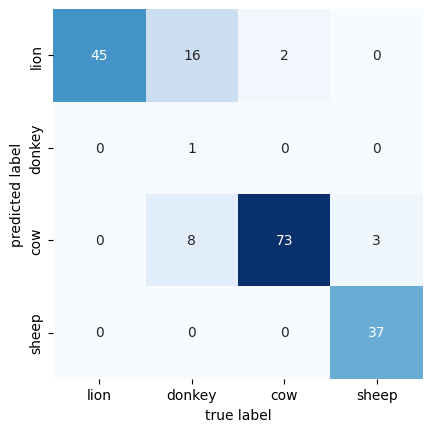

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=text_list, yticklabels=text_list)
plt.xlabel('true label')
plt.ylabel('predicted label');